<a href="https://colab.research.google.com/github/armandovicencio/DataScience/blob/main/Challenge1_data_science_latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:


# Agregar una columna para identificar la tienda
tienda1['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Combinar los datos en un solo DataFrame
datos = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

datos

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda 4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 4


In [ ]:
# Renombrar Columnas
datos = datos.rename(columns={
    'index': 'Id',
    'Categoría del Producto': 'Categoria',
    'Costo de envío': 'Costo_Envio',
    'Fecha de Compra': 'Fecha_Compra',
    'Lugar de Compra': 'Lugar_Compra',
    'Método de pago': 'Metodo_Pago',
    'Cantidad de cuotas': 'Cuotas'
})

# Convertir columnas relevantes a tipos de datos adecuados
datos['Precio'] = pd.to_numeric(datos['Precio'])
datos['Costo_Envio'] = pd.to_numeric(datos['Costo_Envio'])
datos['Calificación'] = pd.to_numeric(datos['Calificación'])
datos['Fecha_Compra'] = pd.to_datetime(datos['Fecha_Compra'])

# Ingresos totales por tienda
ingresos = datos.groupby('Tienda')['Precio'].sum()


print("\nIngresos Totales por Tienda ($):")
print(ingresos)


Ingresos Totales por Tienda ($):
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


<ipython-input-51-aedb389f9923>:16: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  datos['Fecha_Compra'] = pd.to_datetime(datos['Fecha_Compra'])


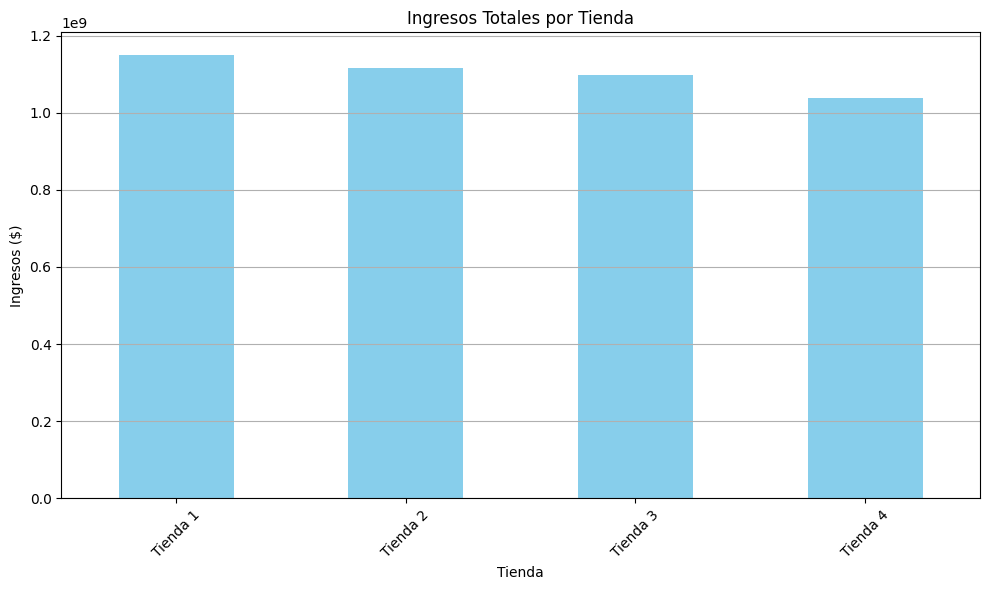

In [ ]:
import matplotlib.pyplot as plt
# Gráfico: Ingresos totales por tienda
plt.figure(figsize=(10, 6))
ingresos.plot(kind='bar', color='skyblue')
plt.title('Ingresos Totales por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingresos ($)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
#Categorías más vendidas por tienda
categorias = datos.groupby(['Tienda', 'Categoria'])['Precio'].sum().reset_index()
categorias_top = categorias.sort_values(['Tienda', 'Precio'], ascending=[True, False]).groupby('Tienda').head(1)

print("\nCategorías más vendidas por tienda :")
print(categorias)


Categorías más vendidas por tienda :
      Tienda                Categoria       Precio
0   Tienda 1  Artículos para el hogar   12698400.0
1   Tienda 1     Deportes y diversión   39290000.0
2   Tienda 1        Electrodomésticos  363685200.0
3   Tienda 1             Electrónicos  429493500.0
4   Tienda 1   Instrumentos musicales   91299000.0
5   Tienda 1                 Juguetes   17995700.0
6   Tienda 1                   Libros    8784900.0
7   Tienda 1                  Muebles  187633700.0
8   Tienda 2  Artículos para el hogar   14746900.0
9   Tienda 2     Deportes y diversión   34744500.0
10  Tienda 2        Electrodomésticos  348567800.0
11  Tienda 2             Electrónicos  410831100.0
12  Tienda 2   Instrumentos musicales  104990300.0
13  Tienda 2                 Juguetes   15945400.0
14  Tienda 2                   Libros   10091200.0
15  Tienda 2                  Muebles  176426300.0
16  Tienda 3  Artículos para el hogar   15060000.0
17  Tienda 3     Deportes y diversión   3559

<ipython-input-54-19e2ca9d6fe9>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_5_categorias = categorias.groupby('Tienda').apply(lambda x: x.nlargest(5, 'Precio')).reset_index(drop=True)


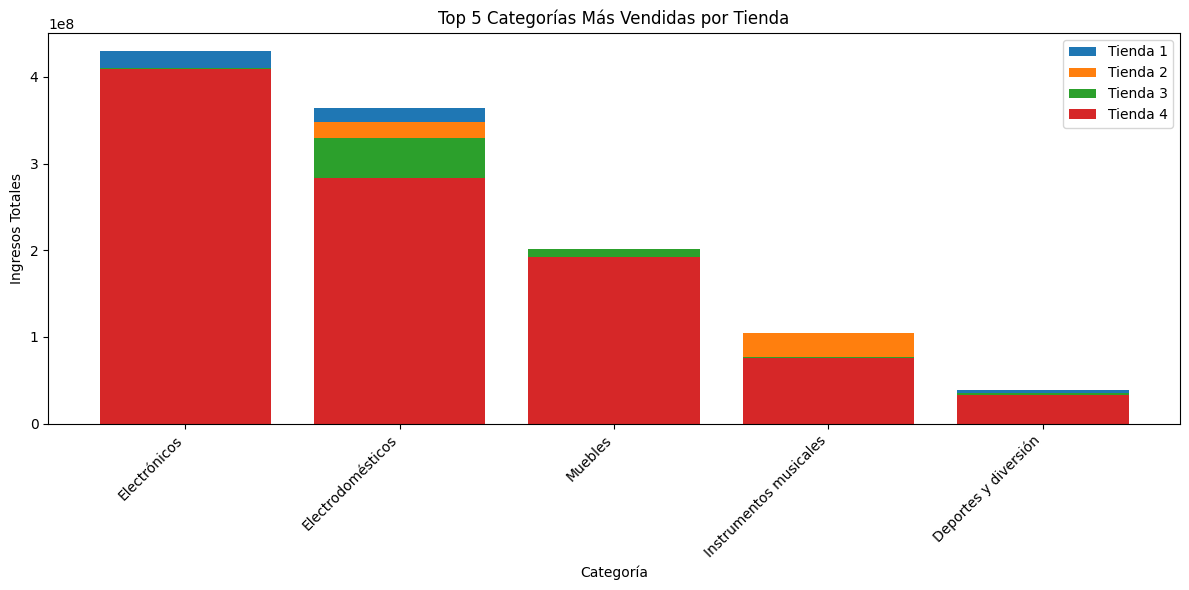

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Categorías más vendidas por tienda
categorias = datos.groupby(['Tienda', 'Categoria'])['Precio'].sum().reset_index()

# Obtener las 5 categorías más vendidas por tienda
top_5_categorias = categorias.groupby('Tienda').apply(lambda x: x.nlargest(5, 'Precio')).reset_index(drop=True)


#  Gráfico: Las 5 categorías más vendidas por tienda
plt.figure(figsize=(12, 6))

for tienda in top_5_categorias['Tienda'].unique():
    tienda_data = top_5_categorias[top_5_categorias['Tienda'] == tienda]
    plt.bar(tienda_data['Categoria'], tienda_data['Precio'], label=tienda)

plt.title('Top 5 Categorías Más Vendidas por Tienda')
plt.xlabel('Categoría')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejor legibilidad
plt.legend()
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
#Calificación promedio por tienda
calificaciones = datos.groupby('Tienda')['Calificación'].mean()
print("\nCalificación promedio por tienda:")
print(calificaciones)


Calificación promedio por tienda:
Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64


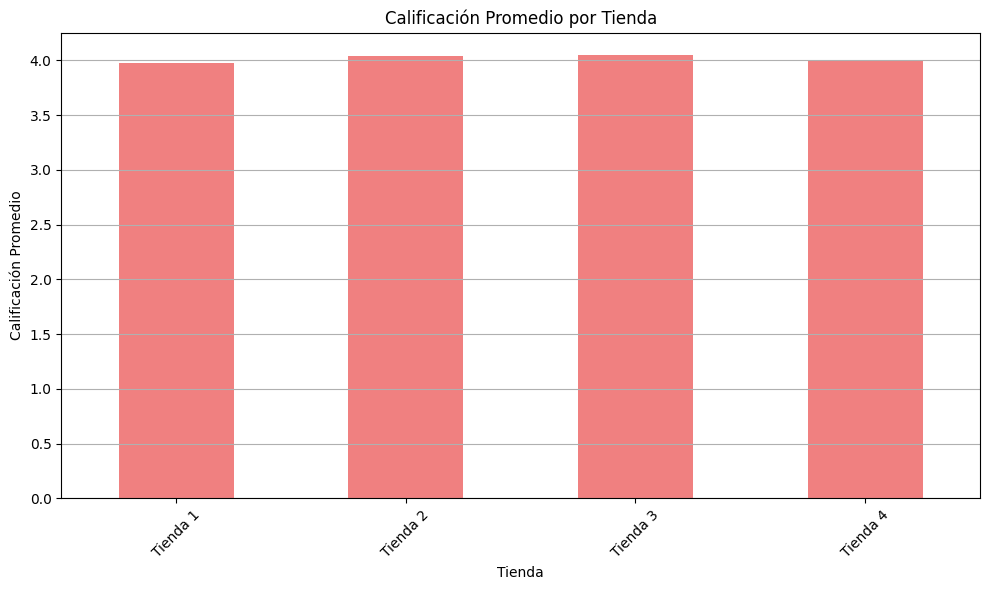

In [ ]:
# Gráfico: Calificación promedio por tienda
plt.figure(figsize=(10, 6))
calificaciones.plot(kind='bar', color='lightcoral')
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
# 5. Productos más vendidos por tienda
productos = datos.groupby(['Tienda', 'Categoria'])['Producto'].count().reset_index()
productos = productos.rename(columns={'Producto': 'Cantidad_Vendida'})
productos_top = productos.sort_values(['Tienda', 'Cantidad_Vendida'], ascending=[True, False]).groupby('Tienda').head(1)
print("\nProductos más vendidos por tienda (en términos de cantidad de ventas):")
print(productos)


Productos más vendidos por tienda (en términos de cantidad de ventas):
      Tienda                Categoria  Cantidad_Vendida
0   Tienda 1  Artículos para el hogar               171
1   Tienda 1     Deportes y diversión               284
2   Tienda 1        Electrodomésticos               312
3   Tienda 1             Electrónicos               448
4   Tienda 1   Instrumentos musicales               182
5   Tienda 1                 Juguetes               324
6   Tienda 1                   Libros               173
7   Tienda 1                  Muebles               465
8   Tienda 2  Artículos para el hogar               181
9   Tienda 2     Deportes y diversión               275
10  Tienda 2        Electrodomésticos               305
11  Tienda 2             Electrónicos               422
12  Tienda 2   Instrumentos musicales               224
13  Tienda 2                 Juguetes               313
14  Tienda 2                   Libros               197
15  Tienda 2                  Mu

In [ ]:
# Calcular ventas por categoría para todas las tiendas
ventas_por_categoria = datos.groupby('Categoria')['Producto'].sum().reset_index()
ventas_por_categoria = ventas_por_categoria.sort_values('Producto', ascending=False)

# Mostrar las categorías más y menos vendidas
categoria_mas_vendida = ventas_por_categoria.iloc[0]
categoria_menos_vendida = ventas_por_categoria.iloc[-1]
print("\nCategoría menos vendida:")
print(categoria_menos_vendida)
print("\nCategoría más vendida:")
print(categoria_mas_vendida)




Categoría menos vendida:
Categoria                                         Electrónicos
Producto     Asistente virtualAuricularesTV LED UHD 4KImpre...
Name: 3, dtype: object

Categoría más vendida:
Categoria                              Artículos para el hogar
Producto     Olla de presiónCuberteríaSet de ollasSet de ol...
Name: 0, dtype: object


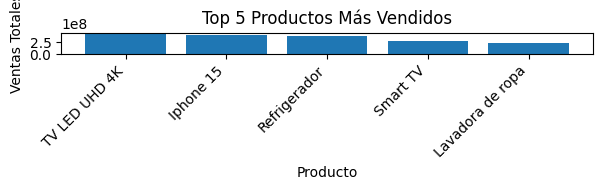

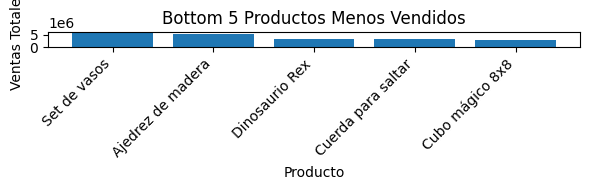


Producto más vendido:
Producto    TV LED UHD 4K
Precio        432489600.0
Name: 48, dtype: object

Producto menos vendido:


,16
Producto,Cubo mágico 8x8
Precio,2729300.0


In [ ]:
#Gráfico:Los productos mas y menos vendidos acotados al tamaño de la celda (para poder mostrarlos)

import pandas as pd
import matplotlib.pyplot as plt


# Productos más y menos vendidos (con ajuste de tamaño del gráfico)
ventas_por_producto = datos.groupby('Producto')['Precio'].sum().reset_index()
ventas_por_producto = ventas_por_producto.sort_values('Precio', ascending=False)

# Obtener el producto más y menos vendido
producto_mas_vendido = ventas_por_producto.iloc[0]
producto_menos_vendido = ventas_por_producto.iloc[-1]

# Crear el gráfico con tamaño ajustado a la celda
plt.figure(figsize=(6, 2))  # Ajustar el tamaño de la figura
plt.bar(ventas_por_producto['Producto'][:5], ventas_por_producto['Precio'][:5])
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()


plt.figure(figsize=(6, 2))  # Ajustar el tamaño de la figura
plt.bar(ventas_por_producto['Producto'][-5:], ventas_por_producto['Precio'][-5:])
plt.xticks(rotation=45, ha='right')
plt.title('Bottom 5 Productos Menos Vendidos')
plt.xlabel('Producto')
plt.ylabel('Ventas Totales')
plt.tight_layout()  # Ajustar el diseño para evitar superposiciones
plt.show()

print("\nProducto más vendido:")
print(producto_mas_vendido)
print("\nProducto menos vendido:")
producto_menos_vendido


# 5. Envío promedio por tienda

In [ ]:
#Costo de envío promedio por tienda
costo_envio = datos.groupby('Tienda')['Costo_Envio'].mean()
print("\nCosto de envío promedio por tienda:")
print(costo_envio)


Costo de envío promedio por tienda:
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo_Envio, dtype: float64


In [ ]:
# Resumen de los resultados
print("Resumen de Métricas:")
print("\nIngresos Totales por Tienda ($):")
print(ingresos)
print("\nCalificaciones Promedio por Tienda (1-5):")
print(calificaciones)
print("\nCosto de Envío Promedio por Tienda ($):")
print(costo_envio)
print("\nCategoría Más Vendida por Tienda (en ingresos):")
print(categorias_top[['Tienda', 'Categoria', 'Precio']])
print("\nProducto Más Vendido por Tienda (en cantidad):")
print(productos_top[['Tienda', 'Categoria', 'Cantidad_Vendida']])

Resumen de Métricas:

Ingresos Totales por Tienda ($):
Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64

Calificaciones Promedio por Tienda (1-5):
Tienda
Tienda 1    3.976685
Tienda 2    4.037304
Tienda 3    4.048326
Tienda 4    3.995759
Name: Calificación, dtype: float64

Costo de Envío Promedio por Tienda ($):
Tienda
Tienda 1    26018.609580
Tienda 2    25216.235693
Tienda 3    24805.680373
Tienda 4    23459.457167
Name: Costo_Envio, dtype: float64

Categoría Más Vendida por Tienda (en ingresos):
      Tienda     Categoria       Precio
3   Tienda 1  Electrónicos  429493500.0
11  Tienda 2  Electrónicos  410831100.0
19  Tienda 3  Electrónicos  410775800.0
27  Tienda 4  Electrónicos  409476100.0

Producto Más Vendido por Tienda (en cantidad):
      Tienda Categoria  Cantidad_Vendida
7   Tienda 1   Muebles               465
15  Tienda 2   Muebles               442
23  Tienda 3   Muebles               4

In [ ]:
# Recomendación final
# Identificar la tienda menos eficiente basada en ingresos y calificaciones
peor_tienda = ingresos.idxmin() if ingresos.min() == ingresos.min() else calificaciones.idxmin()
if calificaciones[peor_tienda] < calificaciones.mean() and ingresos[peor_tienda] < ingresos.mean():
    print(f"\nRecomendación: El Sr. Juan debería considerar vender la **{peor_tienda}**. "
          f"Esta tienda tiene los ingresos más bajos (${ingresos[peor_tienda]:.2f}), "
          f"una calificación promedio de {calificaciones[peor_tienda]:.2f} (por debajo del promedio), "
          f"y un costo de envío promedio de ${costo_envio[peor_tienda]:.2f}, "
          f"lo que indica un rendimiento inferior en comparación con las otras tiendas.")
else:
    print(f"\nRecomendación: El Sr. Juan debería considerar vender la **{peor_tienda}**. "
          f"Esta tienda tiene los ingresos más bajos (${ingresos[peor_tienda]:.2f}) y "
          f"una calificación promedio de {calificaciones[peor_tienda]:.2f}, "
          f"lo que sugiere un desempeño menos competitivo, aunque el costo de envío "
          f"(${costo_envio[peor_tienda]:.2f}) es comparable al de otras tiendas.")


Recomendación: El Sr. Juan debería considerar vender la **Tienda 4**. Esta tienda tiene los ingresos más bajos ($1038375700.00), una calificación promedio de 4.00 (por debajo del promedio), y un costo de envío promedio de $23459.46, lo que indica un rendimiento inferior en comparación con las otras tiendas.
